In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [5]:
df_DA_US = df[(df['job_title']=='Data Analyst') & (df['job_country']=='United States')].copy()

In [7]:
df_DA_US['job_posted_month_no'] = df_DA_US['job_posted_date'].dt.month

In [8]:
df_DA_US_explode = df_DA_US.explode('job_skills')

In [38]:
df_DA_US_pivot = df_DA_US_explode.pivot_table(index='job_posted_month_no',columns='job_skills',aggfunc='size',fill_value=0) 

In [39]:
df_DA_US_pivot.loc['Total'] = df_DA_US_pivot.sum()
df_DA_US_pivot = df_DA_US_pivot[df_DA_US_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_US_pivot = df_DA_US_pivot.drop('Total')
df_DA_US_pivot

job_skills,sql,excel,tableau,python,power bi,sas,r,word,powerpoint,oracle,...,flutter,tidyr,theano,elixir,electron,chainer,symphony,svelte,sqlserver,next.js
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,1138,781,646,529,326,394,338,169,176,164,...,0,0,0,0,0,0,0,0,0,0
2,782,544,408,378,302,270,233,128,130,99,...,0,0,0,0,0,0,0,0,0,0
3,802,580,463,400,277,300,241,142,127,107,...,0,0,0,0,0,0,0,0,0,0
4,845,577,462,421,292,258,238,143,133,122,...,1,0,0,0,0,0,0,0,0,0
5,706,490,367,336,251,206,219,92,119,98,...,0,0,0,0,0,0,0,0,0,0
6,742,491,395,396,272,202,252,126,116,99,...,0,0,0,0,1,0,0,0,0,0
7,560,431,296,292,190,182,188,101,101,62,...,0,0,0,0,0,0,0,0,1,1
8,784,641,480,460,292,272,321,112,133,98,...,0,0,0,0,0,0,0,0,0,0
9,485,336,277,253,183,150,157,65,53,67,...,0,0,0,0,0,0,1,0,0,0


In [53]:
DA_totals = df_DA_US.groupby('job_posted_month_no').size()
DA_totals

job_posted_month_no
1     1816
2     1284
3     1362
4     1369
5     1156
6     1207
7      955
8     1414
9      856
10    1002
11     848
12     817
dtype: int64

In [54]:
df_DA_US_percent = df_DA_US_pivot.div(DA_totals/100,axis=0)

In [55]:
#changes month number to month name
df_DA_US_percent = df_DA_US_percent.reset_index()
df_DA_US_percent['job_posted_month'] = df_DA_US_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_US_percent = df_DA_US_percent.set_index('job_posted_month')
df_DA_US_percent = df_DA_US_percent.drop(columns='job_posted_month_no')

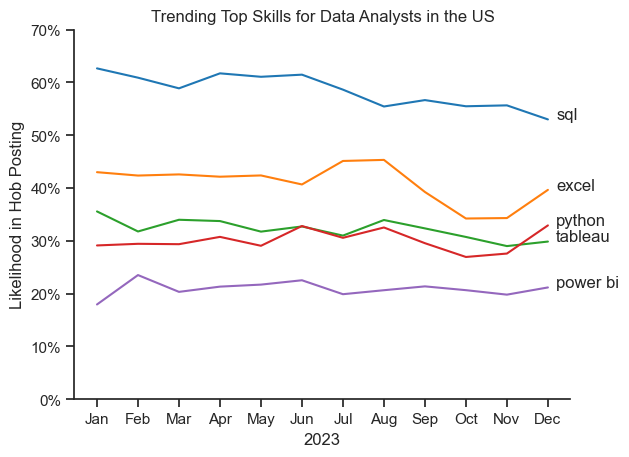

In [83]:
df_plot = df_DA_US_percent.iloc[:,:5]

sns.lineplot(data=df_plot, dashes=False,palette='tab10')
sns.set_theme(style='ticks')
sns.despine()

plt.title('Trending Top Skills for Data Analysts in the US')
plt.ylabel('Likelihood in Hob Posting')
plt.xlabel('2023')
plt.legend().remove()
plt.ylim(0,70)

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

for i in range(5):
    plt.text(11.2,df_plot.iloc[-1,i],df_plot.columns[i])

plt.show()